In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import collections
from collections import Counter
import warnings; warnings.filterwarnings("ignore"); warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('E:\JUPYTER NOTE BOOK\Dataset/brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
df['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [5]:
def married(x):
  if x=='Yes':
    return 1
  else:
    return 0
def residance(x):
  if x=='Urban':
    return 1
  else:
    return 0
def smoke(x):
  if x=='formerly smoked' or x=='smokes':
    return 1
  else:
    return 0

In [6]:
df['ever_married']=df['ever_married'].apply(lambda x:married(x))
df['smoking_status']=df['smoking_status'].apply(lambda x:smoke(x))
df['Residence_type'] = df['Residence_type'].apply(lambda x:residance(x))

In [7]:
df['gender'] = df['gender'].map({'Female':1,'Male':0})
df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,1,1
1,0,80.0,0,1,1,0,0,105.92,32.5,0,1
2,1,49.0,0,0,1,0,1,171.23,34.4,1,1
3,1,79.0,1,0,1,1,0,174.12,24.0,0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,1,1


In [9]:
X = df.iloc[:,:-1]
Y = df['stroke']

# Oversampling for to handle imbalanced data set

In [10]:
ros=RandomOverSampler()
ros_X,ros_Y=ros.fit_resample(X,Y)
print('Before sampling class distribution:',Counter(Y))
print('After sampling class distribution:',Counter(ros_Y))

Before sampling class distribution: Counter({0: 4733, 1: 248})
After sampling class distribution: Counter({1: 4733, 0: 4733})


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(ros_X,ros_Y,test_size = 0.2, random_state=42,stratify=ros_Y)

In [12]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(7572, 10) (7572,)
(1894, 10) (1894,)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# KNN model

In [14]:
test_acc=[]
train_acc=[]

for i in range(3,15):
  knn = KNeighborsClassifier(i) #setting up a knn classifier
  knn.fit(X_train,Y_train) #fitting the model
  # computing the accuracy for both the trainig and the test data
  train_acc.append(knn.score(X_train,Y_train))
  test_acc.append(knn.score(X_test,Y_test))

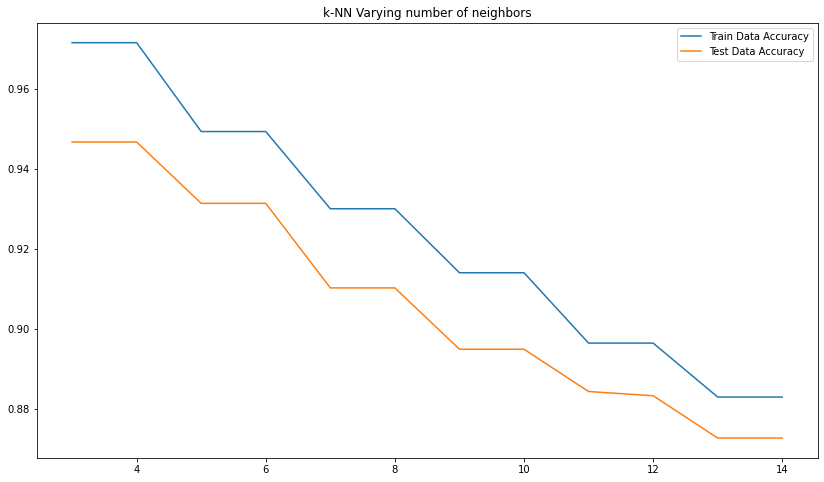

In [15]:
plt.figure(figsize=(14,8))
plt.title('k-NN Varying number of neighbors')
sns.lineplot(range(3,15),train_acc,label='Train Data Accuracy')
sns.lineplot(range(3,15),test_acc,label='Test Data Accuracy')
plt.show()

In [16]:
param_grid = {'n_neighbors':np.arange(2,4)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,Y_train)
knn_cv.best_params_

{'n_neighbors': 2}

In [17]:
test_class_preds=knn_cv.predict(X_test)
train_class_preds=knn_cv.predict(X_train)

In [18]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds)

#print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)
print("The accuracy on train dataset is", train_accuracy)

The accuracy on test dataset is 0.9720168954593453
The accuracy on train dataset is 1.0


In [19]:
cm1 = confusion_matrix(Y_test, test_class_preds)
print(cm1)

[[894  53]
 [  0 947]]


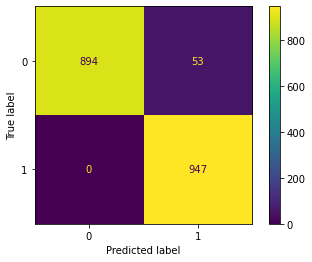

In [20]:
cm = confusion_matrix(Y_test,test_class_preds, labels =knn_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =knn_cv.classes_)
disp.plot()

In [21]:
clf_report = classification_report(Y_test, test_class_preds)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       947
           1       0.95      1.00      0.97       947

    accuracy                           0.97      1894
   macro avg       0.97      0.97      0.97      1894
weighted avg       0.97      0.97      0.97      1894



# **Logistic Regression**

In [22]:
lr= LogisticRegression()

lr.fit(X_train, Y_train)
pred= lr.predict(X_test)

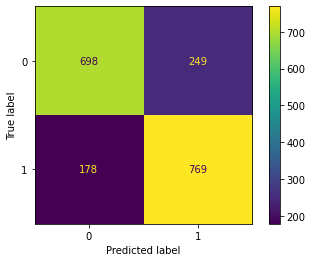

In [23]:
cm = confusion_matrix(Y_test, pred, labels = lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
disp.plot()

In [24]:
clf_report = classification_report(Y_test, pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       947
           1       0.76      0.81      0.78       947

    accuracy                           0.77      1894
   macro avg       0.78      0.77      0.77      1894
weighted avg       0.78      0.77      0.77      1894



# Random forest

In [25]:
rf= RandomForestClassifier()
# Fit
rf.fit(X_train,Y_train)
rf_pred= rf.predict(X_test)

In [26]:
Y_test[:10]

345     0
1813    0
2833    0
4254    0
2525    0
8599    1
4383    0
6671    1
5163    1
8336    1
Name: stroke, dtype: int64

In [27]:
rf_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

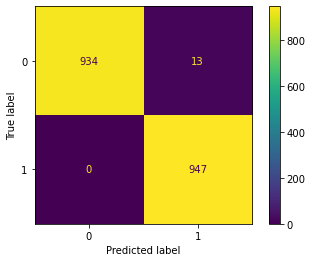

In [28]:
cm = confusion_matrix(Y_test, rf_pred, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)
disp.plot()

In [29]:
clf_report = classification_report(Y_test, rf_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       947
           1       0.99      1.00      0.99       947

    accuracy                           0.99      1894
   macro avg       0.99      0.99      0.99      1894
weighted avg       0.99      0.99      0.99      1894



# SVM classifier

In [30]:
svc=SVC(kernel='rbf')
svc.fit(X_train,Y_train)
svc_pred=svc.predict(X_test)

In [31]:
clf_report = classification_report(Y_test, svc_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       947
           1       0.77      0.86      0.81       947

    accuracy                           0.80      1894
   macro avg       0.81      0.80      0.80      1894
weighted avg       0.81      0.80      0.80      1894



# Decision Tree classifier

In [32]:
dt= DecisionTreeClassifier()
# Fit
dt.fit(X_train,Y_train)
dt_pred= rf.predict(X_test)

In [33]:
cm = confusion_matrix(Y_test,dt_pred)
print(cm)

[[934  13]
 [  0 947]]


In [34]:
clf_report = classification_report(Y_test,dt_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       947
           1       0.99      1.00      0.99       947

    accuracy                           0.99      1894
   macro avg       0.99      0.99      0.99      1894
weighted avg       0.99      0.99      0.99      1894

